In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_excel (r'cleaning_1.xlsx')
df.shape

(2285, 3)

In [2]:
df.head()

,question,new_id,intent
0,طفلتي لديها حساسيه في الصدر وعندما تاتيها الكح...,1465,drug+dose
1,ابنى سنه 4 سنوات مرض بالجدرى منذ ايام اود ان ا...,258,contageos
2,ابني به مرض القدم اليد الفم اعطته الطبيبة فنجي...,312,contagious
3,هل يمكن أن تنتقل عدوى السعال الديكي من الطفل إ...,2372,contagious
4,السلام عليكم nطفلي عمره سنة و شهرين يعاني من ا...,8,drug+dose


In [3]:
df.isna().sum()

question    0
new_id      0
intent      0
dtype: int64

In [4]:
df['intent'].replace(to_replace=[' drug+dose','drug+dose', 'drug+dpse'], value='drugs', inplace=True)
df['intent'].replace(to_replace=['contageos', 'contagious'] ,value ='contageous', inplace=True)
df['intent'].replace(to_replace=['info', 'Info'], value='information', inplace=True)

In [5]:
df['intent'].unique()

array(['drugs', 'contageous', 'food+product', 'information', 'options',
       'reaction', 'symptoms', 'test', 'vaccine'], dtype=object)

In [6]:
df['intent'].value_counts()

symptoms        929
drugs           694
food+product    302
information     225
vaccine          59
test             48
options          22
contageous        5
reaction          1
Name: intent, dtype: int64

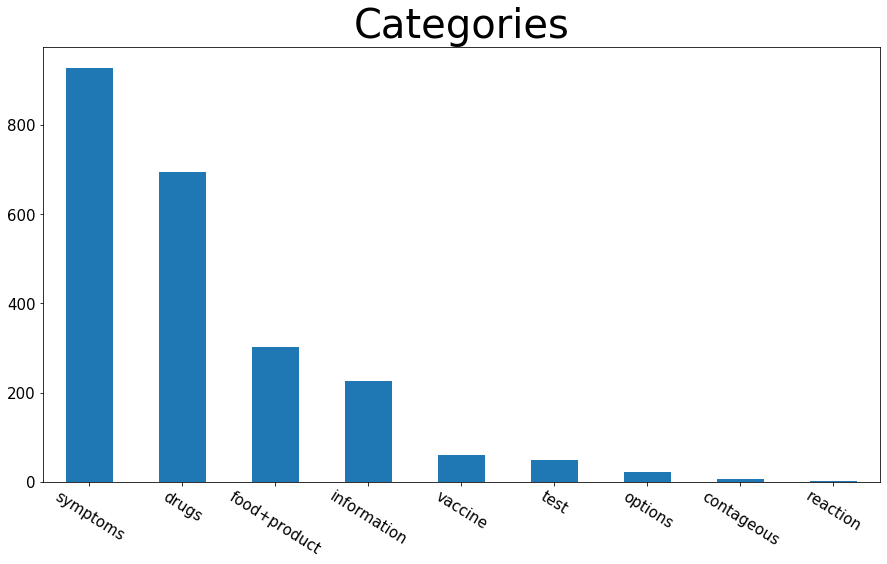

In [37]:
plot=df['intent'].value_counts().plot(kind='bar',figsize=(15,8))


plt.title("Categories",fontsize=40);
#plt.ylabel("cancelled",fontsize=20);
#plt.xlabel("cancelled",fontsize=20);
plt.xticks(rotation=-32,fontsize=15);
plt.yticks(fontsize=15);


fig = plot.get_figure()
fig.savefig("D:\output.png")

In [45]:
dff= df[(df['intent'] !='contageous')&(df['intent'] !='information')&(df['intent']!='options')&(df['intent'] !='reaction')&(df['intent'] !='test')]

In [46]:
dff['question'].duplicated().any()

False

In [47]:
dff.shape

(1984, 3)

In [48]:
dff.intent.unique()

array(['drugs', 'food+product', 'symptoms', 'vaccine'], dtype=object)

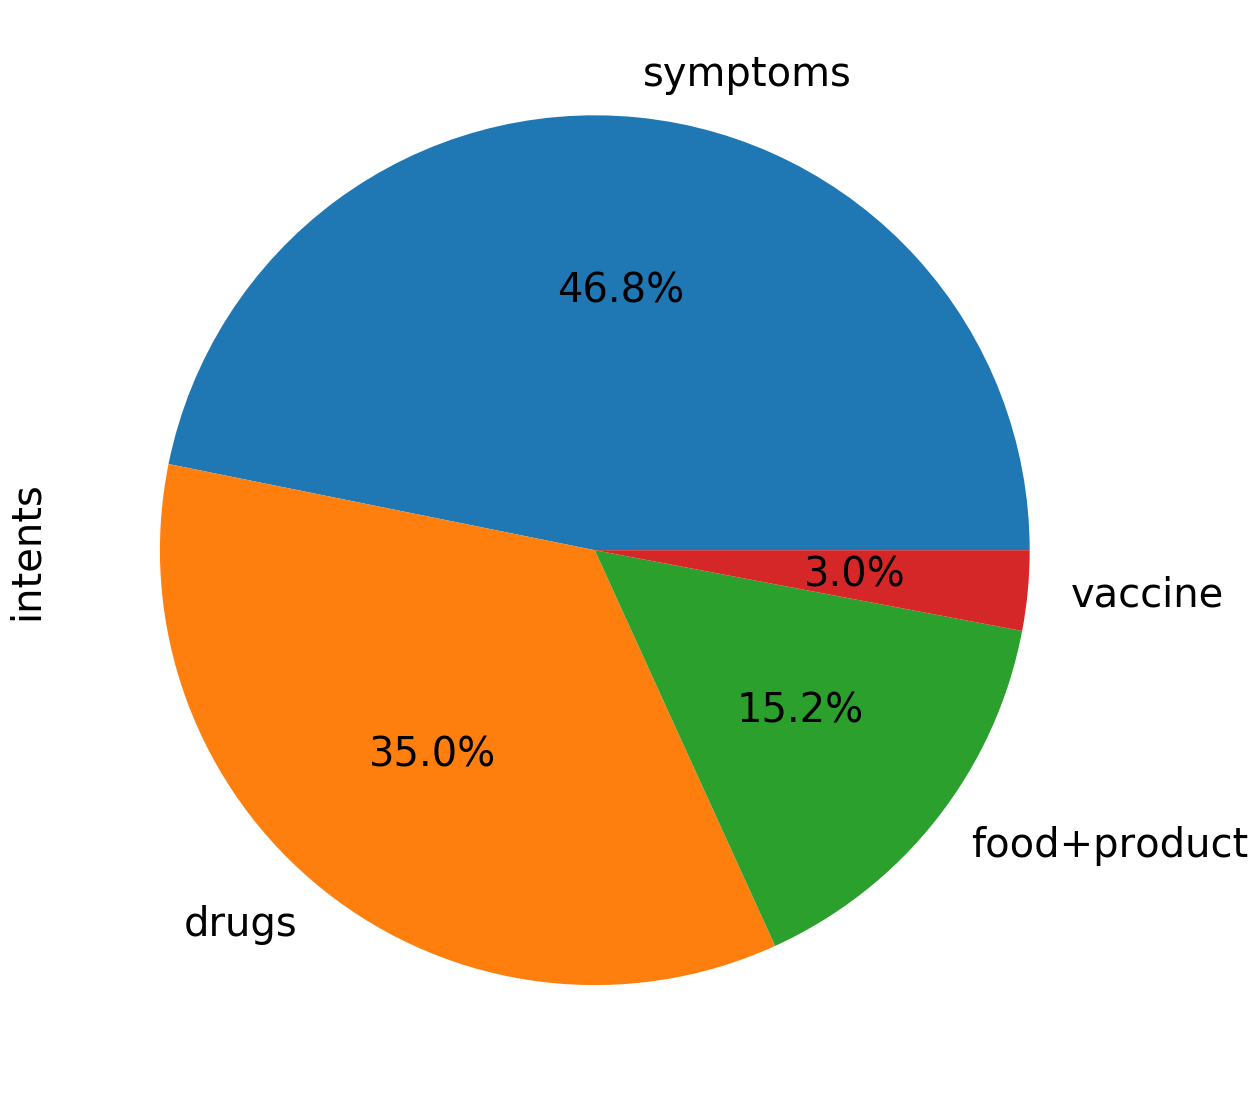

In [56]:
plot = (dff.intent.value_counts()*100.0 /len(dff))\
.plot.pie(autopct='%.1f%%',figsize =(25,20),fontsize=40)
plt.ylabel("intents",fontsize=40);


fig = plot.get_figure()
fig.savefig("D:\output.png")